In [1]:
import pandas as pd 

In [34]:
df = pd.read_csv("Africa_climate_change.csv")

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464815 entries, 0 to 464814
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   DATE     464815 non-null  object 
 1   PRCP     177575 non-null  float64
 2   TAVG     458439 non-null  float64
 3   TMAX     363901 non-null  float64
 4   TMIN     332757 non-null  float64
 5   COUNTRY  464815 non-null  object 
dtypes: float64(4), object(2)
memory usage: 21.3+ MB


On remarque la variable DATE est en format Object , ce qui n'est pas normal , nous devons donc la transformer en format adapté qui est le format Date 

In [36]:
df["DATE"] = pd.to_datetime(df["DATE"])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464815 entries, 0 to 464814
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   DATE     464815 non-null  datetime64[ns]
 1   PRCP     177575 non-null  float64       
 2   TAVG     458439 non-null  float64       
 3   TMAX     363901 non-null  float64       
 4   TMIN     332757 non-null  float64       
 5   COUNTRY  464815 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 21.3+ MB


In [77]:
df.head(15)

,DATE,TAVG,TMAX,TMIN,COUNTRY,Outlier_Type
0,1980-01-01,54.0,61.0,43.0,Tunisia,Normal
1,1980-01-01,49.0,55.0,41.0,Tunisia,Normal
2,1980-01-01,72.0,86.0,59.0,Cameroon,Normal
3,1980-01-01,50.0,55.0,43.0,Tunisia,Normal
4,1980-01-01,75.0,91.0,68.0,Cameroon,Normal
5,1980-01-01,52.0,61.0,45.0,Tunisia,Normal
6,1980-01-01,76.0,97.0,59.0,Senegal,Normal
7,1980-01-01,74.0,95.0,59.0,Senegal,Normal
8,1980-01-01,78.0,93.0,63.0,Senegal,Normal
9,1980-01-01,76.0,91.0,59.0,Senegal,Normal


In [39]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
DATE,464815,2002-10-27 06:36:16.891881856,1980-01-01 00:00:00,1992-07-02 00:00:00,2003-06-29 00:00:00,2013-06-30 00:00:00,2023-08-23 00:00:00,NaN
PRCP,177575.0,0.120941,0.0,0.0,0.0,0.01,19.69,0.486208
TAVG,458439.0,77.029838,-49.0,70.0,80.0,85.0,110.0,11.523634
TMAX,363901.0,88.713969,41.0,81.0,90.0,99.0,123.0,13.042631
TMIN,332757.0,65.548262,12.0,58.0,68.0,74.0,97.0,11.536547


In [40]:
df.isnull().sum()

DATE            0
PRCP       287240
TAVG         6376
TMAX       100914
TMIN       132058
COUNTRY         0
dtype: int64

In [41]:
df.isnull().mean()*100

DATE        0.000000
PRCP       61.796629
TAVG        1.371729
TMAX       21.710573
TMIN       28.410873
COUNTRY     0.000000
dtype: float64

Nous avons ici des variables tels que : PRCP , TAVG , TMAX , TMIN qui ont respectivement : 61.79% , 1.37% , 21.71% et 28.41% . Pour la variable PRCP qui est la precipitation de pluie , elle possède un nombre important de valeurs nulles et sachant qu'elle ne sera pas trop utile dans notre analyse , nous allons donc supprimer la colonne . Pour les autres variables nous allons remplacer les valeurs nulls par la methode appropriée en etudiant leur differentes distributions .

In [42]:
df = df.drop(columns=["PRCP"])

In [43]:
df["TAVG"].describe().T

count    458439.000000
mean         77.029838
std          11.523634
min         -49.000000
25%          70.000000
50%          80.000000
75%          85.000000
max         110.000000
Name: TAVG, dtype: float64

In [ ]:
Nous remarquons ici dans notre describe que la température moyenne quotidienne est moyennée à 77 F , l'ecart type est de 11.52 ce qui est raisonnable , 
la temperature minimum par contre qui est de -49 F parait basse pour des regions en Afrique . 

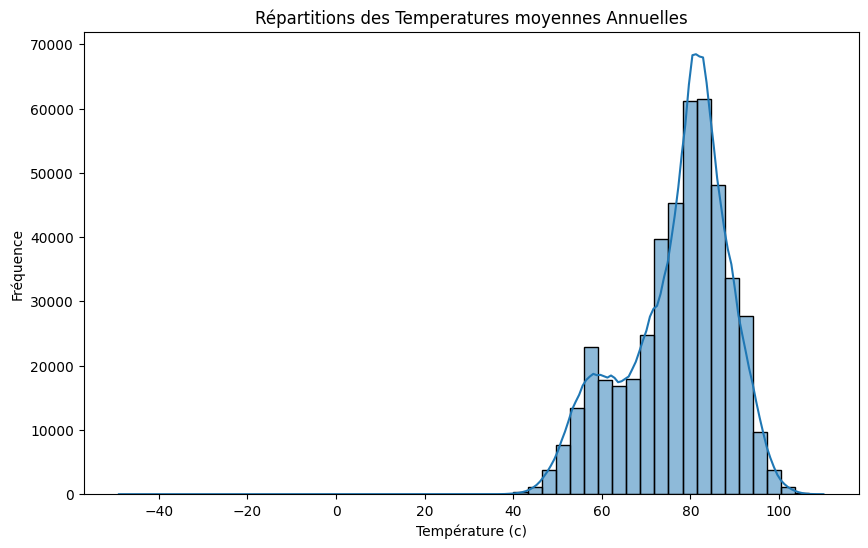

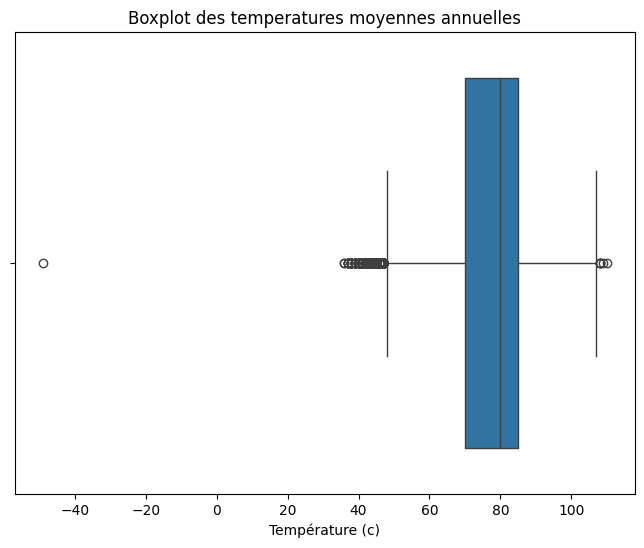

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tracer de l'histogramme 
plt.figure(figsize=(10,6))
sns.histplot(df['TAVG'],kde=True, bins=50)
plt.title("Répartitions des Temperatures moyennes Annuelles")
plt.xlabel("Température (c)")
plt.ylabel("Fréquence")
plt.show()

# Boxplot pour detecter les Outliers
plt.figure(figsize=(8,6))
sns.boxplot(x=df['TAVG'])
plt.title("Boxplot des temperatures moyennes annuelles")
plt.xlabel('Température (c)')
plt.show()

In [ ]:
Detection des valeurs abérantes 

In [45]:

Q1 = df['TAVG'].quantile(0.25)
Q3 = df['TAVG'].quantile(0.75)
IQR = Q3-Q1 

Borne_inf = Q1 - 1.5*IQR
Borne_sup = Q3 + 1.5*IQR

outliers = df[(df['TAVG']<Borne_inf)|(df['TAVG']>Borne_sup)]

print("Nombre d'outliers :",outliers.shape[0])
print("Limites : [", Borne_inf, ",", Borne_sup, "]")
print(outliers[['TAVG']])


Nombre d'outliers : 2500
Limites : [ 47.5 , 107.5 ]
         TAVG
70       47.0
77       46.0
98       46.0
100      45.0
120      43.0
...       ...
458824   44.0
458857   47.0
458892   47.0
460304  -49.0
462696  110.0

[2500 rows x 1 columns]


In [46]:
print(df['TAVG'].skew())

-0.6040941928886995


In [ ]:
Au vu des histogrammes et boxplots nous avons remarquer des irregularités , à la suite nous avons detecter des valeurs abérantes et encore avec le 
calcul de symétrie avec la fonction skew() , nous avons obtenu -0.6 qui confirme que nous avons en face de nous une distribution asymetrique d'ou 
necessité de travailler avec la mediane pour remplacer les valeurs nulles et abérantes .

In [47]:
import numpy as np



# Définir les bins (bornes)
bins = [-float('inf'), 47.5, 107.5, float('inf')]

# Définir les labels pour chaque intervalle
labels = ['Outlier_Bas', 'Normal', 'Outlier_Haut']

# Appliquer pd.cut() pour classer les valeurs selon les bins et labels
df['Outlier_Type'] = pd.cut(df['TAVG'], bins=bins, labels=labels)

# Compter le nombre de valeurs dans chaque intervalle
counts = df['Outlier_Type'].value_counts()

# Afficher le résultat
print(counts)


Outlier_Type
Normal          455939
Outlier_Bas       2494
Outlier_Haut         6
Name: count, dtype: int64


In [ ]:
Nous allons remplacer les valeurs aberantes par la mediane .

In [48]:
df['TAVG'] = df['TAVG'].fillna(df['TAVG'].median())
df['TAVG'] = df['TAVG'].apply(lambda x: df['TAVG'].median() if x < Borne_inf or x > Borne_sup else x )

Nous allons observer nos histogrammes afin de constater s'il y a eu un leger changement 

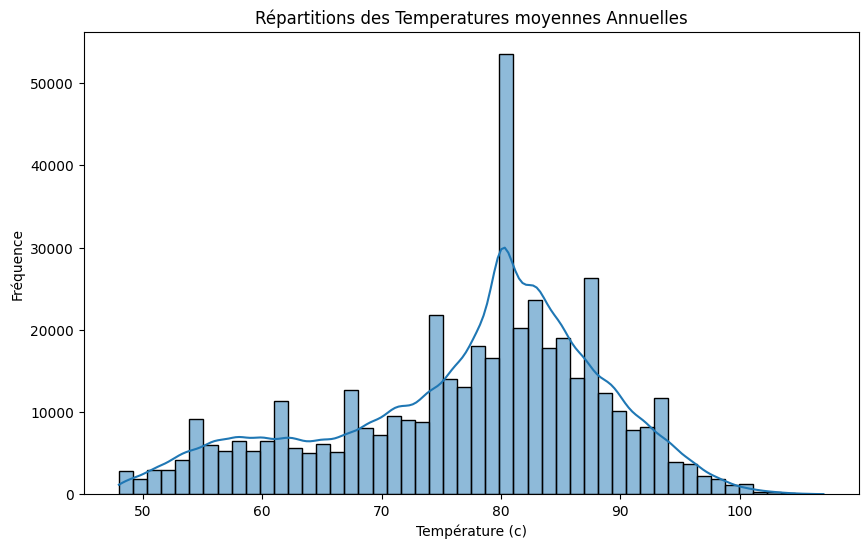

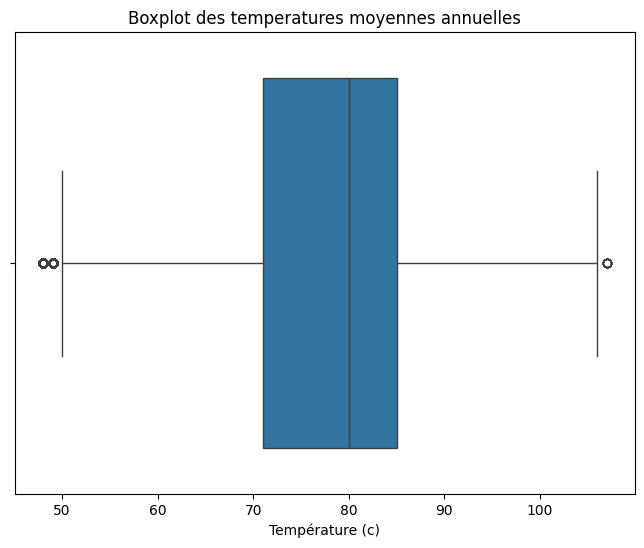

In [49]:
plt.figure(figsize=(10,6))
sns.histplot(df['TAVG'],kde=True, bins=50)
plt.title("Répartitions des Temperatures moyennes Annuelles")
plt.xlabel("Température (c)")
plt.ylabel("Fréquence")
plt.show()

# Boxplot pour detecter les Outliers
plt.figure(figsize=(8,6))
sns.boxplot(x=df['TAVG'])
plt.title("Boxplot des temperatures moyennes annuelles")
plt.xlabel('Température (c)')
plt.show()

In [50]:
print(df['TAVG'].skew())

-0.5828692511554467


In [ ]:
Nous allons faire de meme pour la variable TMAX

In [51]:
df['TMAX'].describe().T

count    363901.000000
mean         88.713969
std          13.042631
min          41.000000
25%          81.000000
50%          90.000000
75%          99.000000
max         123.000000
Name: TMAX, dtype: float64

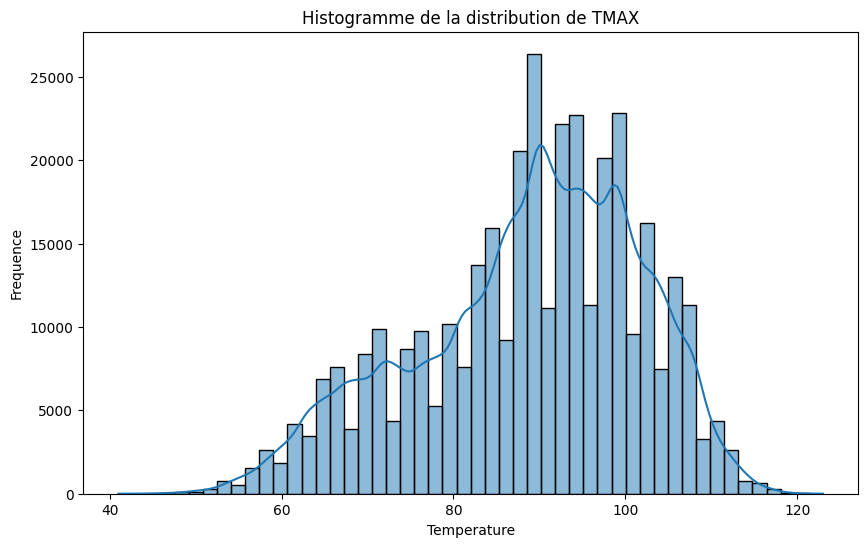

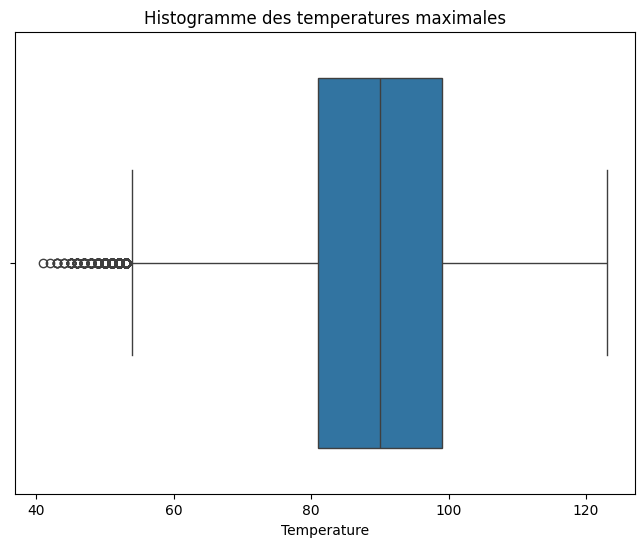

In [52]:
plt.figure(figsize=(10,6))
sns.histplot(df['TMAX'], kde = True , bins=50)
plt.title("Histogramme de la distribution de TMAX")
plt.xlabel("Temperature")
plt.ylabel("Frequence")
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x=(df['TMAX']))
plt.title("Histogramme des temperatures maximales")
plt.xlabel("Temperature")
plt.show()

In [53]:
df["TMAX"].skew()

np.float64(-0.48437413739991636)

In [ ]:
Nous avons bien une asymetrie negative de TMAX . Nous allons chercher à detecter d'eventuelles valeurs abérantes .

In [55]:
Q1 = df["TMAX"].quantile(0.25)
Q3 = df["TMAX"].quantile(0.75)
IQR = Q3 - Q1

Borne_inf = Q1 - 1.5*IQR
Borne_sup = Q3 + 1.5*IQR

outliers = df[(df["TMAX"]<Borne_inf) | (df["TMAX"]>Borne_sup)]

print(f"Nous avons {len(outliers)} outliers")

Nous avons 856 outliers


In [ ]:
A travers la methode des interquartilles , nous avons detecter des valeurs abérantes 

In [57]:
df["TMAX"] = df["TMAX"].fillna(df["TMAX"].median())
df["TMAX"] = df["TMAX"].apply(lambda x : df["TMAX"].median() if x < Borne_inf or x > Borne_sup else  x )

In [ ]:
Nous allons donc voir les changements qui se sont operés 

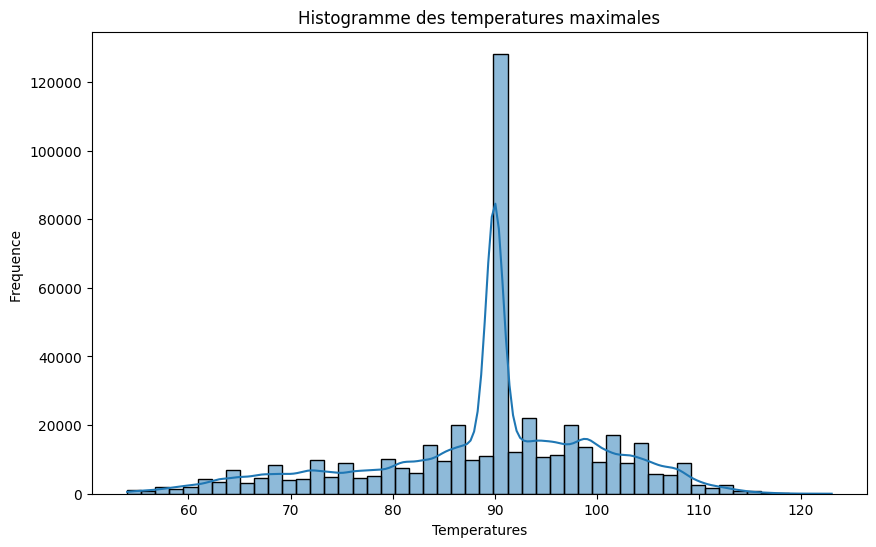

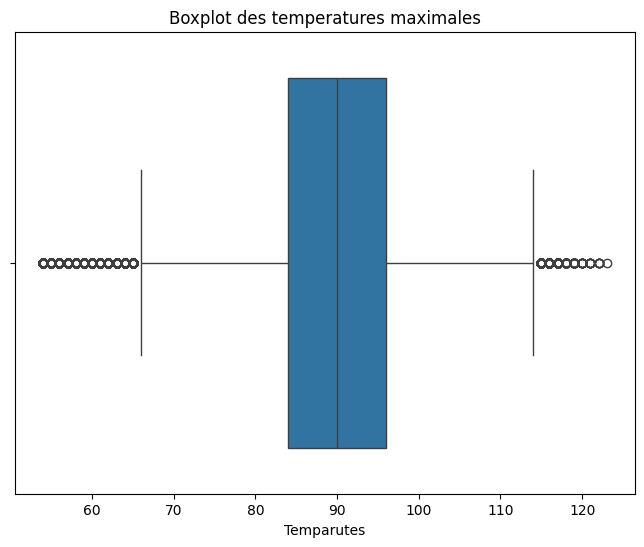

In [58]:
plt.figure(figsize=(10,6))
sns.histplot(df["TMAX"], kde = True , bins = 50)
plt.title("Histogramme des temperatures maximales")
plt.xlabel("Temperatures")
plt.ylabel("Frequence ")
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x=df["TMAX"])
plt.title("Boxplot des temperatures maximales")
plt.xlabel("Temperatures")
plt.show()

In [ ]:
Nous voyons que le soucis des valeurs abérantes a été nettement ameliorer 

In [ ]:
Nous allons également faire la meme chose pour la variable TMIN 

In [59]:
df["TMIN"].describe().T

count    332757.000000
mean         65.548262
std          11.536547
min          12.000000
25%          58.000000
50%          68.000000
75%          74.000000
max          97.000000
Name: TMIN, dtype: float64

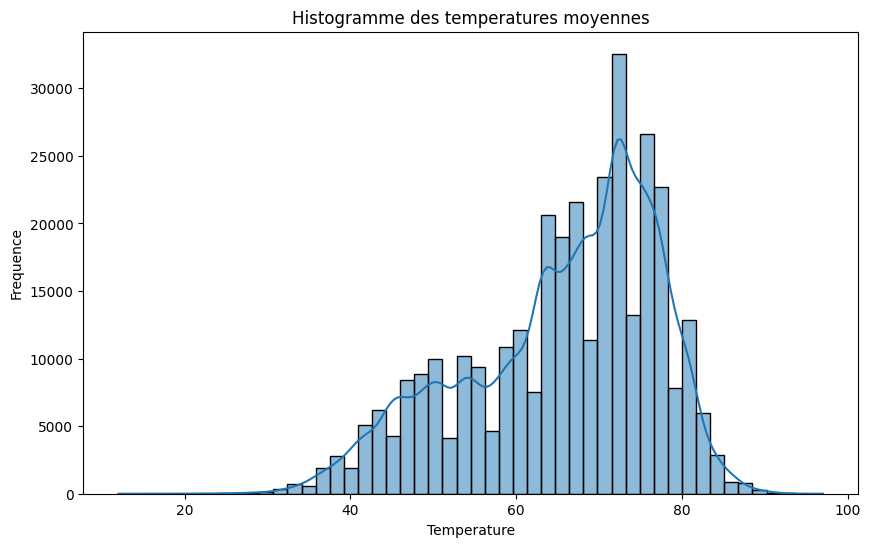

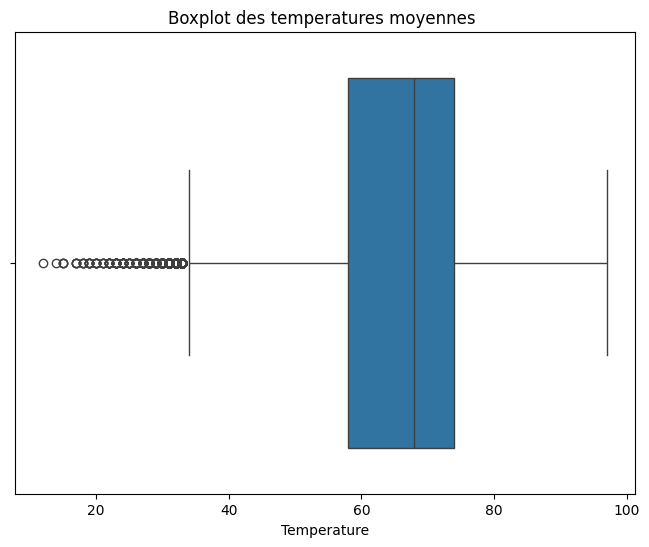

In [60]:
plt.figure(figsize=(10,6))
sns.histplot(df['TMIN'], kde=True , bins = 50)
plt.title("Histogramme des temperatures moyennes")
plt.xlabel("Temperature")
plt.ylabel("Frequence")
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x=df['TMIN'])
plt.title("Boxplot des temperatures moyennes ")
plt.xlabel("Temperature")
plt.show()

In [61]:
df['TMIN'].skew()

np.float64(-0.6649462692894594)

In [ ]:
Au vue de nos differentes observations nous pouvons dire que nous avons une distribution asymetrique negative . Nous allons donc detecter d'eventuels 
outliers .

In [62]:
Q1 = df['TMIN'].quantile(0.25)
Q3 = df['TMIN'].quantile(0.75)
IQR = Q3 - Q1 

Borne_inf = Q1 - 1.5*IQR
Borne_sup = Q3 + 1.5*IQR 

outliers = df[(df["TMIN"]< Borne_inf)|(df["TMIN"]>Borne_sup)]
print(f"Nous avons {len(outliers)} outliers")

Nous avons 914 outliers


In [63]:
df["TMIN"] = df["TMIN"].fillna(df["TMIN"].median())
df["TMIN"] = df["TMIN"].apply(lambda x : df["TMIN"].median() if x < Borne_inf or x > Borne_sup else x )

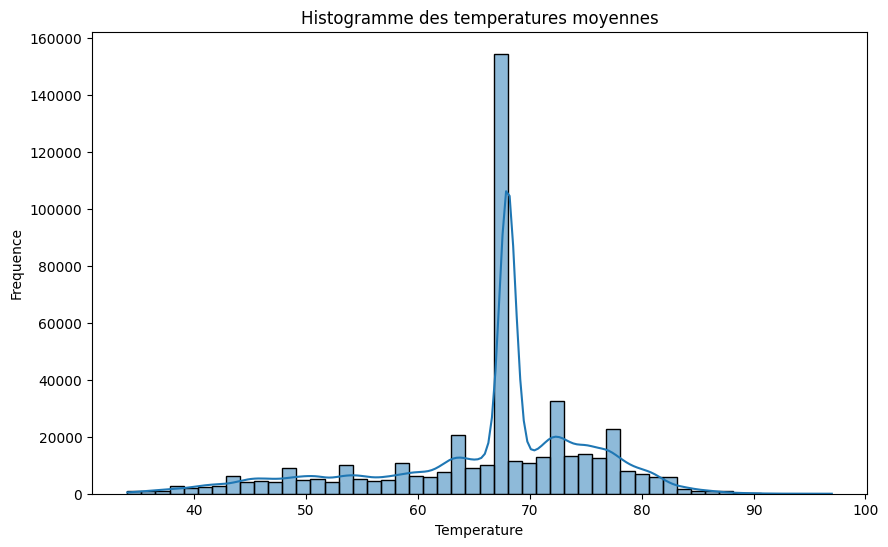

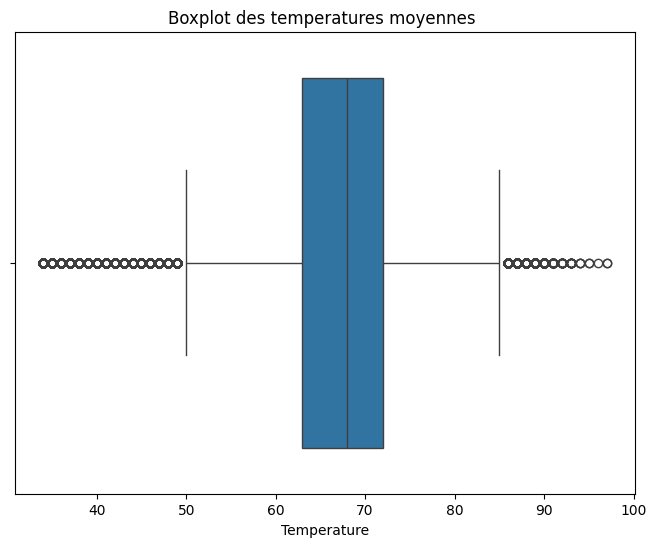

In [64]:
plt.figure(figsize=(10,6))
sns.histplot(df['TMIN'], kde=True , bins = 50)
plt.title("Histogramme des temperatures moyennes")
plt.xlabel("Temperature")
plt.ylabel("Frequence")
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x=df['TMIN'])
plt.title("Boxplot des temperatures moyennes ")
plt.xlabel("Temperature")
plt.show()

3 ) Tracez un graphique linéaire pour montrer les fluctuations moyennes de la température en Tunisie et au Cameroun.  Interprétez les résultats

In [71]:
df_CMT = df[df["COUNTRY"].isin(["Cameroon","Tunisia"])] # regroupement du data en fonction du CMR et TSE

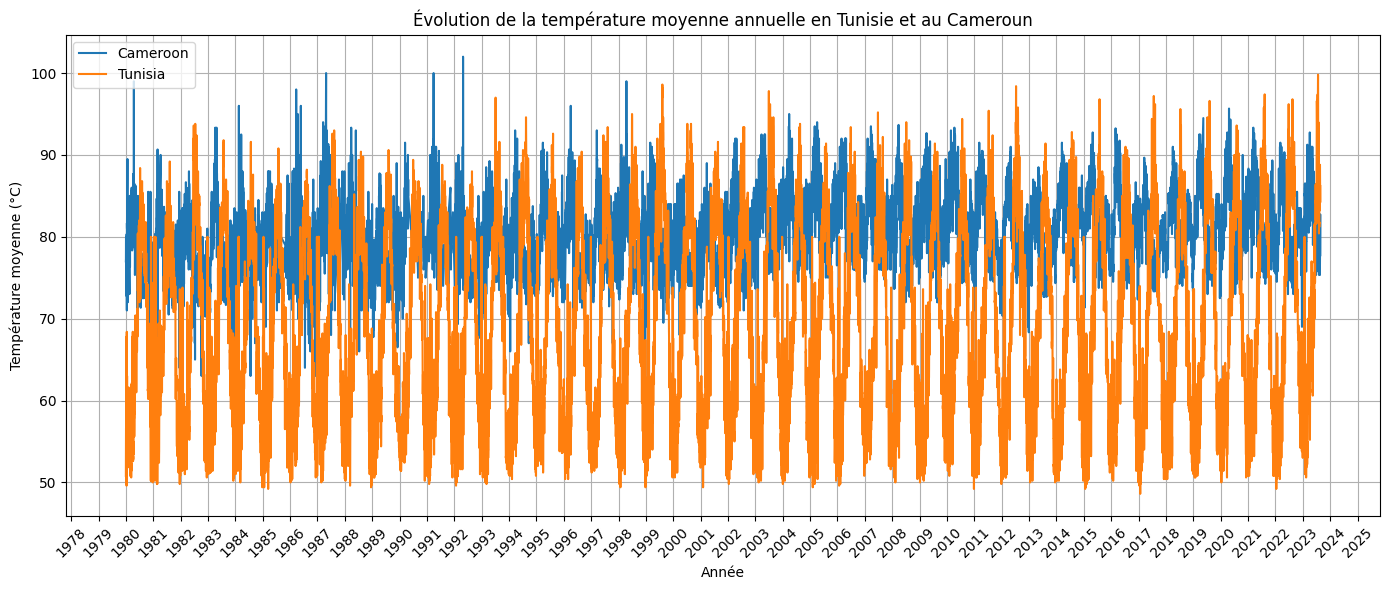

In [74]:
repre_lin = df_CMT.groupby(['DATE','COUNTRY'])['TAVG'].mean().reset_index()

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

plt.figure(figsize=(14, 6))
sns.lineplot(data=repre_lin, x='DATE', y='TAVG', hue='COUNTRY')
plt.title("Évolution de la température moyenne annuelle en Tunisie et au Cameroun")
plt.xlabel("Année")
plt.ylabel("Température moyenne (°C)")
plt.xticks(rotation=45)

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


Intepretation : 
Le graphique linéaire présente l'évolution des températures moyennes annuelles en Tunisie et au Cameroun sur la période étudiée.
On observe que les températures moyennes au Cameroun se situent généralement entre 64°F et 110°F, tandis que celles de la Tunisie oscillent entre 50°F et 100°F.

Cette différence s’explique principalement par la localisation géographique et le type de climat de chaque pays.
Le Cameroun, situé en zone tropicale, connaît des températures plus élevées et plus constantes.
La Tunisie, soumise à un climat méditerranéen, présente une température plus modérée et des fluctuations plus marquées au fil des années.

Par ailleurs, les deux courbes montrent des variations annuelles, parfois abruptes, qui pourraient être le signe de phénomènes climatiques inhabituels ou des effets du changement climatique.

En conclusion, cette visualisation met en évidence non seulement les différences climatiques entre les deux pays, mais aussi la nécessité de suivre ces évolutions dans le temps pour mieux comprendre les dynamiques environnementales régionales.

4)Zoomer pour n'inclure que les données entre 1980 et 2005, essayez de personnaliser les étiquettes des axes.

C:\Users\BAN CYRILLE\AppData\Local\Temp\ipykernel_21452\1984623792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CMT['DATE'] = pd.to_datetime(df_CMT['DATE'])


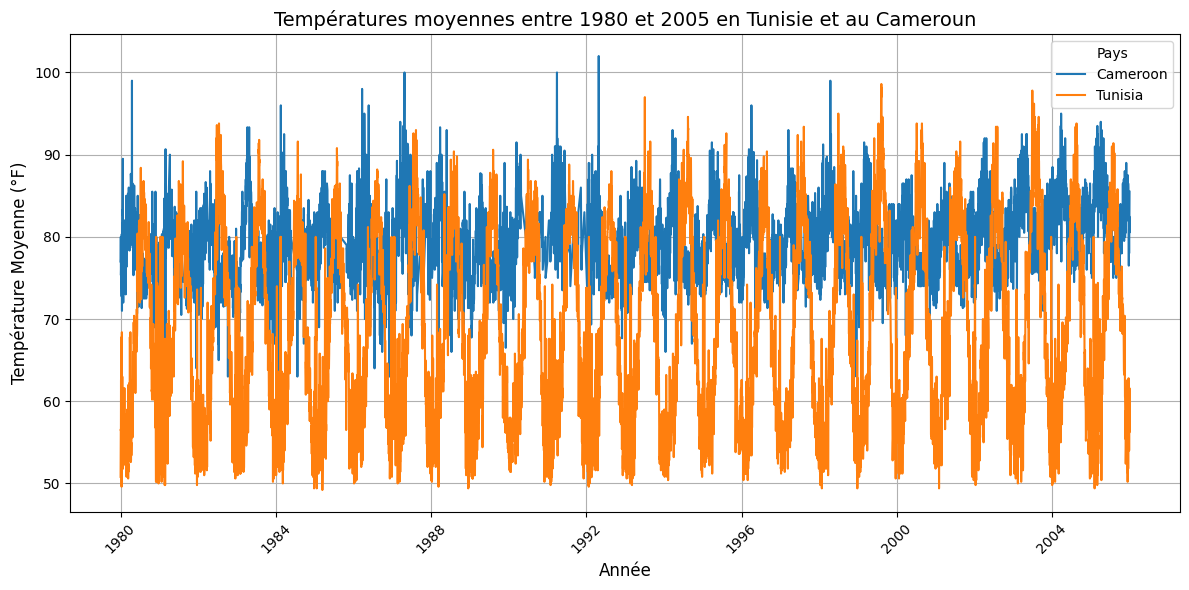

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assurez-vous que la colonne 'DATE' est bien en format datetime
df_CMT['DATE'] = pd.to_datetime(df_CMT['DATE'])

# Filtrer entre 1980 et 2005
df_filtré = df_CMT[(df_CMT['DATE'].dt.year >= 1980) & (df_CMT['DATE'].dt.year <= 2005)]

# Regrouper par date et pays
repre_lin = df_filtré.groupby(['DATE','COUNTRY'])['TAVG'].mean().reset_index()

# Tracer le graphique
plt.figure(figsize=(12, 6))
sns.lineplot(data=repre_lin, x='DATE', y='TAVG', hue='COUNTRY')

# Personnalisation des axes
plt.title("Températures moyennes entre 1980 et 2005 en Tunisie et au Cameroun", fontsize=14)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Température Moyenne (°F)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Pays')
plt.tight_layout()
plt.show()


In [ ]:
5)Créer des Histogrammes pour montrer la distribution de la température au Sénégal entre [1980,2000] et [2000,2023] (dans la même figure). 
Décrivez les résultats obtenus.

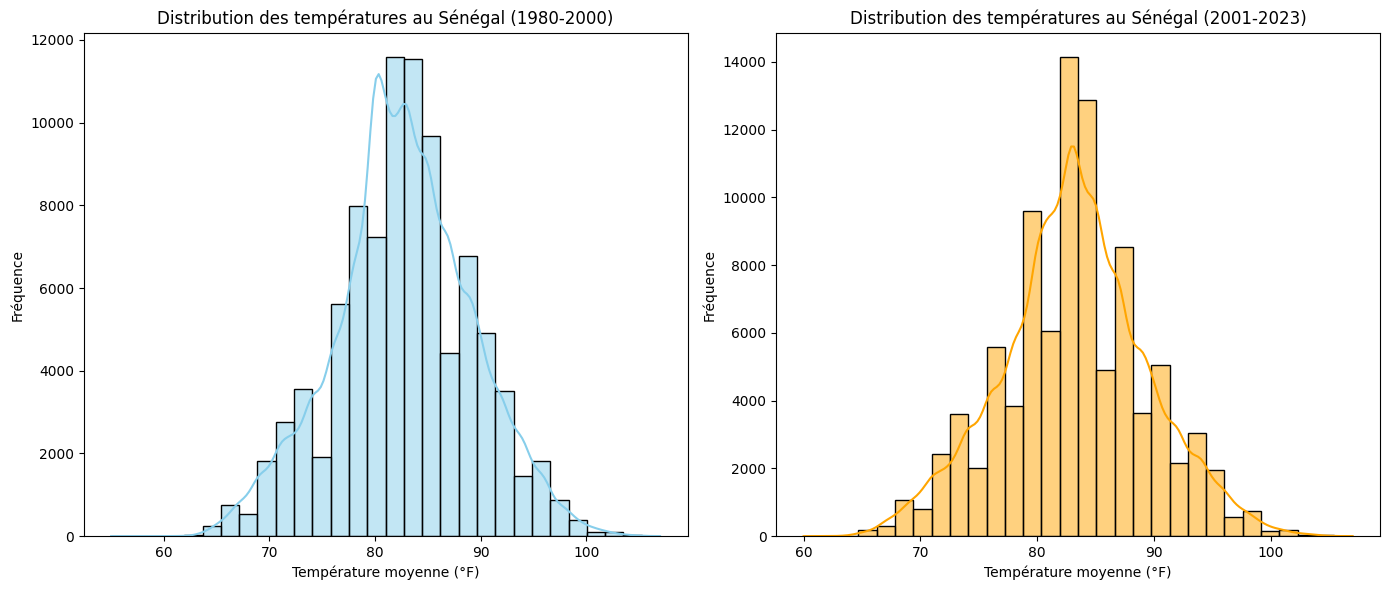

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assurez-vous que 'DATE' est en datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Filtrer les données pour le Sénégal
df_senegal = df[df['COUNTRY'] == 'Senegal']

# Créer deux sous-ensembles de données
df_1980_2000 = df_senegal[(df_senegal['DATE'].dt.year >= 1980) & (df_senegal['DATE'].dt.year <= 2000)]
df_2001_2023 = df_senegal[(df_senegal['DATE'].dt.year > 2000) & (df_senegal['DATE'].dt.year <= 2023)]

# Créer les histogrammes
plt.figure(figsize=(14, 6))

# Histogramme 1980-2000
plt.subplot(1, 2, 1)
sns.histplot(df_1980_2000['TAVG'], bins=30, kde=True, color='skyblue')
plt.title("Distribution des températures au Sénégal (1980-2000)")
plt.xlabel("Température moyenne (°F)")
plt.ylabel("Fréquence")

# Histogramme 2001-2023
plt.subplot(1, 2, 2)
sns.histplot(df_2001_2023['TAVG'], bins=30, kde=True, color='orange')
plt.title("Distribution des températures au Sénégal (2001-2023)")
plt.xlabel("Température moyenne (°F)")
plt.ylabel("Fréquence")

plt.tight_layout()
plt.show()


In [ ]:
6)Sélectionnez le meilleur graphique pour montrer la température moyenne par pays.

C:\Users\BAN CYRILLE\AppData\Local\Temp\ipykernel_21452\2164865841.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=temp_moyenne_pays, x='TAVG', y='COUNTRY', palette='coolwarm')


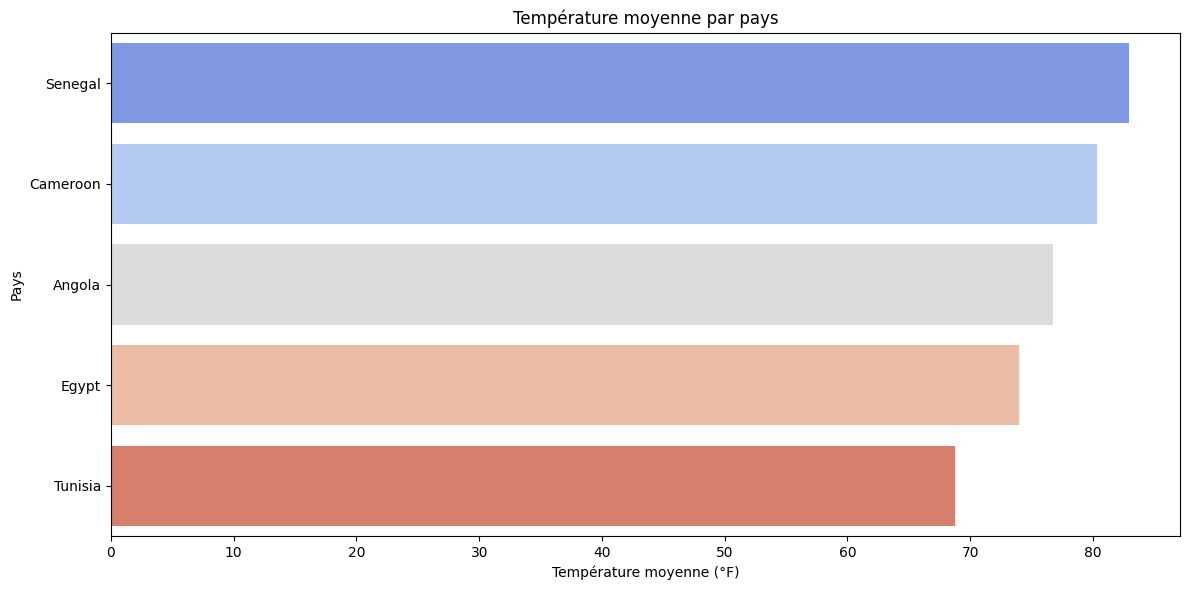

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la température moyenne par pays
temp_moyenne_pays = df.groupby('COUNTRY')['TAVG'].mean().reset_index()

# Trier les pays du plus chaud au plus froid (optionnel)
temp_moyenne_pays = temp_moyenne_pays.sort_values(by='TAVG', ascending=False)

# Créer le graphique
plt.figure(figsize=(12, 6))
sns.barplot(data=temp_moyenne_pays, x='TAVG', y='COUNTRY', palette='coolwarm')
plt.title("Température moyenne par pays")
plt.xlabel("Température moyenne (°F)")
plt.ylabel("Pays")
plt.tight_layout()
plt.show()


7)Faites vos propres questions sur l'ensemble de données et essayez d'y répondre en utilisant les visuels appropriés.